In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, solve_bvp
from scipy.optimize import minimize

In [5]:
def SIR_Demo():
    '''
    Using the SIR model, model the spread of a disease in a city
    of 3 million people where there are initially 5 infected
    people.

    1. Plot the results
    2. Find the number of people still able to work at peak infection
    '''
    #Setup the ODE
    def ode(t, y):
        return np.array([-y[0] * y[1], y[0] * y[1] - (1/3) * y[1], (1/3) * y[1]])

    #Hyperparameters
    t0 = 0
    tf = 50
    x_space = np.linspace(0, 50, 150)
    
    #Define y0 and solution
    y0 = np.array([(3000000 - 5) / 3000000, 5/3000000, 0])
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 150))
    
    #Plot the system
    plt.plot(x_space, sol.y[0],  label='Susceptible')
    plt.plot(x_space, sol.y[1],  label='Infected')
    plt.plot(x_space, sol.y[2],  label='Recovered')
    plt.ylabel("Proportion of Population")
    plt.legend(loc='upper right')
    plt.xlabel("T (days)")
    plt.title("Modelling the Spread of an Epidemic:")
    plt.show()
    

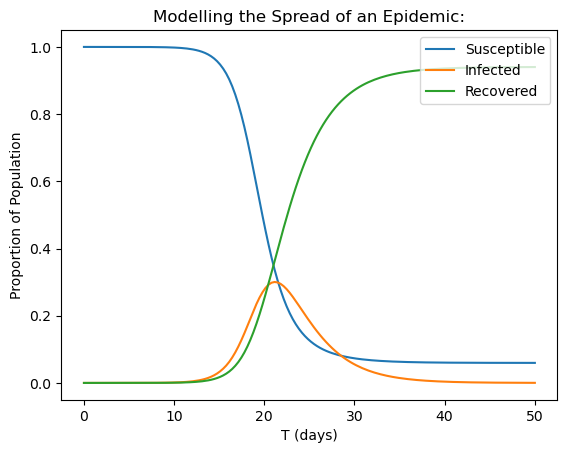

In [6]:
SIR_Demo()

In [ ]:
def first_model():
    
    n = 5
    K = 2/3
    alpha_values = np.random.rand(5)
    # alpha_values = np.array([0.4, 0.4, 0.4, 0.4, 0.4])
    beta_values = np.random.rand(5, 5)
    # beta_values = (beta_values + beta_values.T) / 2
    
    
    def ode(t, y):
        dydt = np.zeros(5)
        # if t >= 60 and t <= 70:
        #     index = np.argmax(y)
        #     temp_alpha = alpha_values[index]
        #     alpha_values[index] = 0
        for i in range(5):
            dydt[i] = y[i] * (alpha_values[i] * (1 - y[i] / K) - np.sum([beta_values[i, j] * y[j] for j in range(5) if j != i]))
        # if t >= 60 and t <= 70:
        #     alpha_values[index] = temp_alpha
        return dydt

    t0 = 0
    tf = 120
    x_space = np.linspace(0, tf, 1000)
    
    #Define y0 and solution
    y0 = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 1000))
    sol.y = sol.y / np.sum(sol.y, axis=0)
    
    #Plot the system
    plt.plot(x_space, sol.y[0],  label='Company 1, alpha = ' + str(alpha_values[0]))
    plt.plot(x_space, sol.y[1],  label='Company 2, alpha = ' + str(alpha_values[1]))
    plt.plot(x_space, sol.y[2],  label='Company 3, alpha = ' + str(alpha_values[2]))
    plt.plot(x_space, sol.y[3],  label='Company 4, alpha = ' + str(alpha_values[3]))
    plt.plot(x_space, sol.y[4],  label='Company 5, alpha = ' + str(alpha_values[4]))
    plt.ylabel("Proportion of Population")
    plt.legend(loc='upper right')
    plt.xlabel("T (days)")
    plt.title("Modelling the Spread of an Epidemic:")
    plt.ylim(0, 1)
    plt.show()

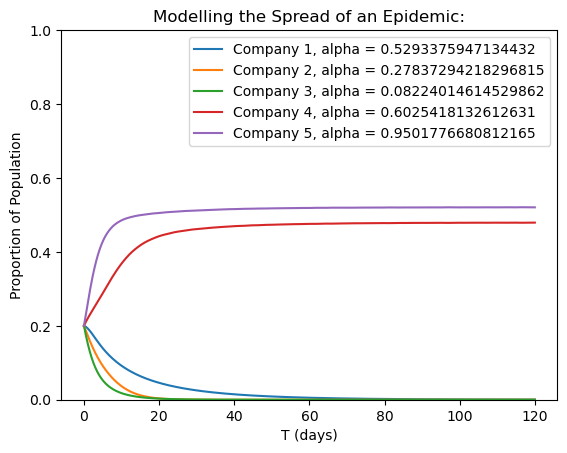

In [141]:
first_model()

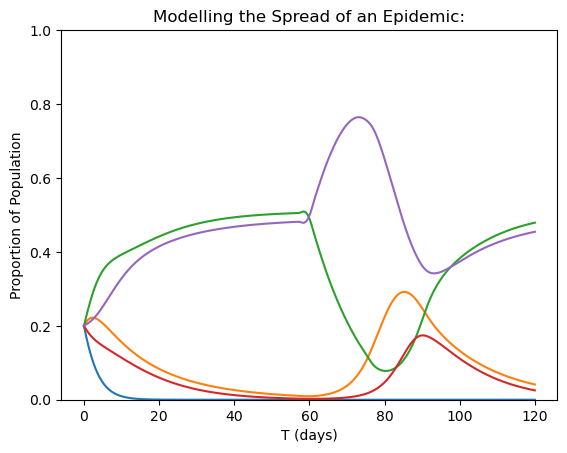

In [164]:
def event_based_model():
    
    n = 5
    K = 2/3
    alpha_values = np.random.rand(5)
    # alpha_values = np.array([0.4, 0.4, 0.4, 0.4, 0.4])
    beta_values = np.random.rand(5, 5)
    # beta_values = (beta_values + beta_values.T) / 2
    
    
    def ode(t, y):
        dydt = np.zeros(5)

        # Event: Company 3 (index 2) performs poorly between t=60 and t=75
        temporary_alpha = alpha_values.copy()  # Copy to modify for events
        if 60 <= t <= 75:
            temporary_alpha[2] *= 0.1  # Reduce Company 3's growth rate significantly
        if 75 <= t <= 90:
            temporary_alpha[2] *= 0.1 * 10 * (t - 75) / 15  # Increase Company 3's growth rate linearly

        for i in range(5):
            competitive_term = np.sum([beta_values[i, j] * y[j] for j in range(5) if j != i])
            dydt[i] = y[i] * (temporary_alpha[i] * (1 - y[i] / K) - competitive_term)
        return dydt

    t0 = 0
    tf = 120
    x_space = np.linspace(0, tf, 1000)
    
    #Define y0 and solution
    y0 = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 1000))
    sol.y = sol.y / np.sum(sol.y, axis=0)
    
    #Plot the system
    plt.plot(x_space, sol.y[0],  label='Company 1, alpha = ' + str(alpha_values[0]))
    plt.plot(x_space, sol.y[1],  label='Company 2, alpha = ' + str(alpha_values[1]))
    plt.plot(x_space, sol.y[2],  label='Company 3, alpha = ' + str(alpha_values[2]))
    plt.plot(x_space, sol.y[3],  label='Company 4, alpha = ' + str(alpha_values[3]))
    plt.plot(x_space, sol.y[4],  label='Company 5, alpha = ' + str(alpha_values[4]))
    plt.ylabel("Proportion of Population")
    # plt.legend(loc='upper right')
    plt.xlabel("T (days)")
    plt.title("Modelling the Spread of an Epidemic:")
    plt.ylim(0, 1)
    plt.show()
    
event_based_model()

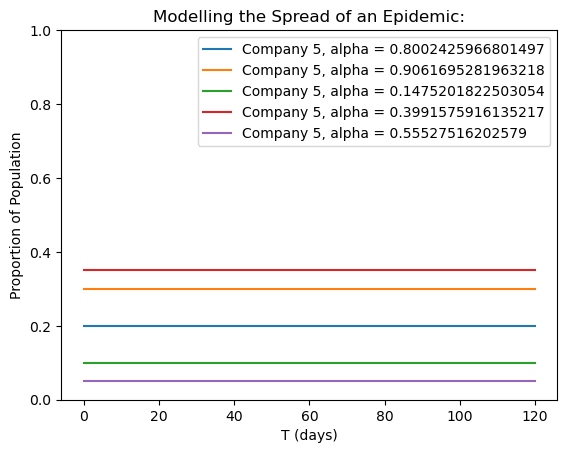

In [ ]:
def third_model():
    
    n = 5
    K = 2/3
    alpha_values = np.random.rand(n)
    # alpha_values = np.array([0.4, 0.4, 0.4, 0.4, 0.4])
    beta_values = np.random.rand(n, n)
    # beta_values = (beta_values + beta_values.T) / 2
    
    
    def ode(t, y):
        
            
        
        dydt = np.zeros(n)
        for i in range(n):
            beta_values = np.random.rand(n)
            for j in range(n):
                beta_values[j] = (alpha_values[j] * (1 - y[j] / K)) / np.sum([y[k] for k in range(5) if k != j])
            dydt[i] = y[i] * (alpha_values[i] * (1 - y[i] / K) - np.sum([beta_values[i] * y[j] for j in range(5) if j != i]))
        return dydt

    t0 = 0
    tf = 120
    x_space = np.linspace(0, tf, 1000)
    
    #Define y0 and solution
    y0 = np.array([0.2, 0.3, 0.1, 0.35, 0.05])
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 1000))
    
    #Plot the system
    for i in range(n):
        plt.plot(x_space, sol.y[i],  label=f'Company {n}, alpha = ' + str(alpha_values[i]))
    plt.ylabel("Proportion of Population")
    plt.legend(loc='upper right')
    plt.xlabel("T (days)")
    plt.title("Modelling the Spread of an Epidemic:")
    plt.ylim(0, 1)
    plt.show()
third_model()